In [3]:
# import pandas as pd
# from pandas_profiling import ProfileReport
# import matplotlib.pyplot as plt    


In [4]:
# h1b = pd.read_pickle("../data/hb1_2m_without_csharp.pkl")
# h1b

In [8]:
# print(h1b.describe(include='all').T.to_latex())

In [9]:
h1b_test = h1b.drop_duplicates().dropna()

In [10]:
# print(h1b_test.describe(include='all').T.to_latex())

In [11]:
# #moronic code
# for i, row in h1b_test.iterrows():
#     row['Month'] = row['START DATE'].split('/')[0]
#     row['Date'] = row['START DATE'].split('/')[1]
#     row['Year'] = row['START DATE'].split('/')[2]

In [12]:
h1b_test[["start_day", "start_month", "start_year"]] = h1b_test["START DATE"].str.split("/", expand = True).astype(float)


In [13]:
h1b_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 603967 entries, 0 to 2495078
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Dice_job_title  603967 non-null  object 
 1   EMPLOYER        603967 non-null  object 
 2   JOB TITLE       603967 non-null  object 
 3   BASE SALARY     603967 non-null  object 
 4   LOCATION        603967 non-null  object 
 5   SUBMIT DATE     603967 non-null  object 
 6   START DATE      603967 non-null  object 
 7   Job_Title       603967 non-null  object 
 8   relatedSkills   603967 non-null  object 
 9   start_day       603967 non-null  float64
 10  start_month     603967 non-null  float64
 11  start_year      603967 non-null  float64
dtypes: float64(3), object(9)
memory usage: 59.9+ MB


In [14]:
h1b_test['state'] = h1b_test["LOCATION"].str[-2:]


In [15]:
column_name  = h1b_test.columns.values.tolist()
column_name.remove("Dice_job_title")

In [16]:
# h1b_test.groupby(column_name)["Dice_job_title"].count()

In [17]:
states = [ 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
           'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
           'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
           'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
           'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']

In [18]:
h1b_test.state.unique()

array(['MD', 'MN', 'VA', 'NY', 'MA', 'KY', 'IL', 'CA', 'GA', 'NJ', 'NC',
       'TX', 'WA', 'CT', 'KS', 'MI', 'WI', 'RI', 'IN', 'NE', 'AZ', 'FL',
       'CO', 'DC', 'SC', 'PA', 'OH', 'NV', 'MO', 'TN', 'IA', 'AL', 'UT',
       'ME', 'ID', 'ND', 'OR', 'AR', 'OK', 'NH', 'DE', 'MS', 'VT', 'LA',
       'MT', 'NM', 'SD', 'WV', 'HI', 'PR', 'RG', 'EO', 'GU', 'MP', 'WY',
       'PW', 'AK', 'VI', ', ', 'MH', 'TY', 'NG', 'IS'], dtype=object)

In [19]:
h1b_clean = h1b_test[h1b_test['state'].isin(states)]
h1b_clean

,Dice_job_title,EMPLOYER,JOB TITLE,BASE SALARY,LOCATION,SUBMIT DATE,START DATE,Job_Title,relatedSkills,start_day,start_month,start_year,state
0,.Net Application Developer,VCA INC,.NET APPLICATION DEVELOPER,"80,000","SILVER SPRING, MD",11/24/2014,11/28/2014,.Net Application Developer,Microsoft technologies;Software development;C#...,11.0,28.0,2014.0,MD
1,.Net Application Developer,OPTUM SERVICES INC,.NET APPLICATION DEVELOPER,"83,158","GOLDEN VALLEY, MN",12/10/2014,12/29/2014,.Net Application Developer,Microsoft technologies;Software development;C#...,12.0,29.0,2014.0,MN
2,.Net Application Developer,LCG INC,.NET APPLICATION DEVELOPER,"89,669","ARLINGTON, VA",12/30/2014,01/12/2015,.Net Application Developer,Microsoft technologies;Software development;C#...,1.0,12.0,2015.0,VA
6,.Net Application Developer,MULTITEK SYSTEMS & DESIGN INCORPORATED,.NET APPLICATION DEVELOPER,"42,000","DEER PARK, NY",03/14/2015,09/12/2015,.Net Application Developer,Microsoft technologies;Software development;C#...,9.0,12.0,2015.0,NY
7,.Net Application Developer,CNET GLOBAL SOLUTIONS INC,.NET APPLICATION DEVELOPER,"60,600","WATERTOWN, MA",08/26/2015,09/04/2015,.Net Application Developer,Microsoft technologies;Software development;C#...,9.0,4.0,2015.0,MA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495074,webMethods Developer,LG CNS AMERICA INC,WEBMETHODS DEVELOPER,"106,960","ENGLEWOOD CLIFFS, NJ",10/05/2020,10/20/2020,webMethods Developer,Web services;JDBC;Java;Quality assurance;webMe...,10.0,20.0,2020.0,NJ
2495075,webMethods Developer,GENERAL MILLS INC,WEBMETHODS DEVELOPER,"115,500","MINNEAPOLIS, MN",09/15/2020,10/05/2020,webMethods Developer,Web services;JDBC;Java;Quality assurance;webMe...,10.0,5.0,2020.0,MN
2495076,webMethods Developer,SRINSOFT INC,WEBMETHODS DEVELOPER,"130,000","RICHMOND, VA",07/02/2020,07/27/2020,webMethods Developer,Web services;JDBC;Java;Quality assurance;webMe...,7.0,27.0,2020.0,VA
2495077,webMethods Developer,SPARTAN SOLUTIONS INC,WEBMETHODS DEVELOPER,"131,726","SAN JOSE, CA",06/01/2020,06/11/2020,webMethods Developer,Web services;JDBC;Java;Quality assurance;webMe...,6.0,11.0,2020.0,CA


In [20]:
# by year, by state, by employers=== functions
h1b_clean["BASE SALARY"] = h1b_clean["BASE SALARY"].str.replace(',', '').astype(int)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [21]:
# h1b_clean.to_pickle('../data/h1b_clean.pkl')
type(h1b_clean.relatedSkills[1])

str

# some basic plots

## the least title and states

In [30]:
list(h1b_clean.groupby('state')['BASE SALARY'].agg(count='size', mean_sent='mean').reset_index().sort_values(by=['count'],ascending=True).head(10).state)


['WY', 'MT', 'AK', 'VT', 'ND', 'SD', 'WV', 'HI', 'ME', 'NM']

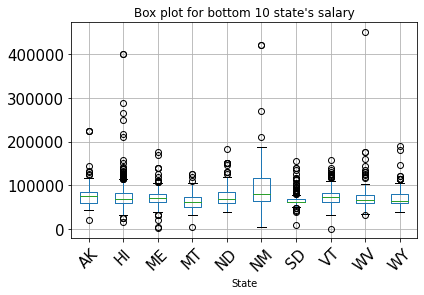

In [31]:
ax = h1b_clean[h1b_clean['state'].isin(['WY', 'MT', 'AK', 'VT', 'ND', 'SD', 'WV', 'HI', 'ME', 'NM'])].boxplot(
    rot=45, fontsize=15,
    by  ='state', column=["BASE SALARY"])
title_boxplot = 'Box plot for bottom 10 state\'s salary'  
plt.title( title_boxplot )
plt.suptitle('') # that's what you're after
ax.set_xlabel("State");
ax = plt.show()

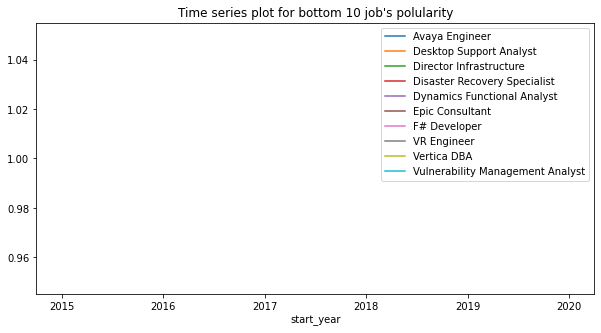

In [33]:
#define index column
h1b_timeseries=h1b_clean[h1b_clean['Dice_job_title'].isin(['Dynamics Functional Analyst',
 'Director Infrastructure',
 'F# Developer',
 'Vulnerability Management Analyst',
 'Vertica DBA',
 'Avaya Engineer',
 'VR Engineer',
 'Desktop Support Analyst',
 'Disaster Recovery Specialist',
 'Epic Consultant'])].groupby(['Dice_job_title','start_year'])['Dice_job_title'].agg(count='size').reset_index()

h1b_timeseries.set_index('start_year', inplace=True)

#group data by product and display sales as line chart
ax = h1b_timeseries.groupby('Dice_job_title')['count'].plot(legend=True,figsize=(10, 5))
title_timeplot = 'Time series plot for bottom 10 job\'s polularity'  
plt.title( title_timeplot )
plt.suptitle('') # that's what you're after
# ax.set_xlabel("Year");
ax = plt.show()

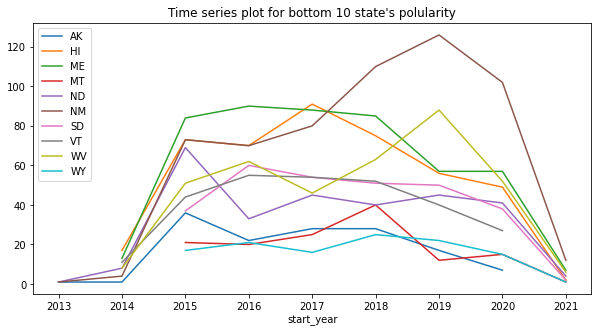

In [34]:
h1b_timeseries=h1b_clean[h1b_clean['state'].isin(['WY', 'MT', 'AK', 'VT', 'ND', 'SD', 'WV', 'HI', 'ME', 'NM'])].groupby(['state','start_year'])['state'].agg(count='size').reset_index()

h1b_timeseries.set_index('start_year', inplace=True)

#group data by product and display sales as line chart
ax = h1b_timeseries.groupby('state')['count'].plot(legend=True,figsize=(10, 5))
title_timeplot = 'Time series plot for bottom 10 state\'s polularity'  
plt.title( title_timeplot )
plt.suptitle('') # that's what you're after
# ax.set_xlabel("Year");
ax = plt.show()

## states

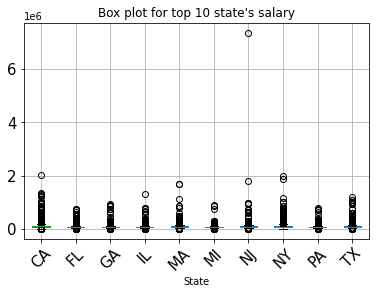

In [41]:
ax = h1b_clean[h1b_clean['state'].isin(['CA','TX','NY',
                                      'NJ','IL','MA','GA','MI','FL','PA'])].boxplot(
    rot=45, fontsize=15,
    by  ='state', column=["BASE SALARY"])
title_boxplot = 'Box plot for top 10 state\'s salary'  
plt.title( title_boxplot )
plt.suptitle('') # that's what you're after
ax.set_xlabel("State");
ax = plt.show()

## time series plot

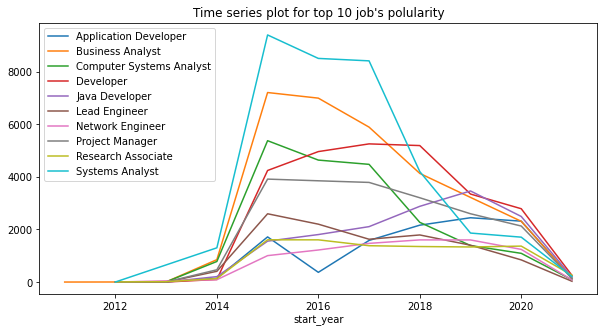

In [97]:
#define index column
h1b_timeseries=h1b_clean[h1b_clean['Dice_job_title'].isin(['Systems Analyst','Research Associate','Lead Engineer',
                                      'Project Manager','Developer','Business Analyst',
                                          'Network Engineer','Java Developer','Computer Systems Analyst',
                                          'Application Developer'])].groupby(['Dice_job_title','start_year'])['Dice_job_title'].agg(count='size').reset_index()

h1b_timeseries.set_index('start_year', inplace=True)

#group data by product and display sales as line chart
ax = h1b_timeseries.groupby('Dice_job_title')['count'].plot(legend=True,figsize=(10, 5))
title_timeplot = 'Time series plot for top 10 job\'s polularity'  
plt.title( title_timeplot )
plt.suptitle('') # that's what you're after
# ax.set_xlabel("Year");
ax = plt.show()

In [79]:
h1b_clean.groupby(['Dice_job_title','start_year'])['Dice_job_title'].agg(count='size').reset_index().sort_values(by=['count'],ascending=False)


,Dice_job_title,start_year,count
6086,Systems Analyst,2015,9394
6087,Systems Analyst,2016,8502
6088,Systems Analyst,2017,8409
621,Business Analyst,2015,7205
622,Business Analyst,2016,6992
...,...,...,...
2576,IT Asset Manager,2020,1
2577,IT Assistant,2015,1
2595,IT Auditor,2021,1
2596,IT Business Analyst,2012,1


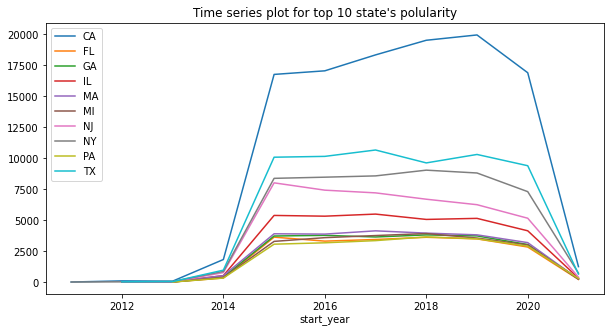

In [98]:
#define index column
h1b_timeseries=h1b_clean[h1b_clean['state'].isin(['CA','TX','NY',
                                      'NJ','IL','MA','GA','MI','FL','PA'])].groupby(['state','start_year'])['state'].agg(count='size').reset_index()

h1b_timeseries.set_index('start_year', inplace=True)

#group data by product and display sales as line chart
ax = h1b_timeseries.groupby('state')['count'].plot(legend=True,figsize=(10, 5))
title_timeplot = 'Time series plot for top 10 state\'s polularity'  
plt.title( title_timeplot )
plt.suptitle('') # that's what you're after
# ax.set_xlabel("Year");
ax = plt.show()

# time series growth rate

In [49]:
h1b_clean['count'] = h1b_clean.groupby('Dice_job_title')['Dice_job_title'].transform('count')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [50]:
h1b_clean

,Dice_job_title,EMPLOYER,JOB TITLE,BASE SALARY,LOCATION,SUBMIT DATE,START DATE,Job_Title,relatedSkills,start_day,start_month,start_year,state,count
0,.Net Application Developer,VCA INC,.NET APPLICATION DEVELOPER,80000,"SILVER SPRING, MD",11/24/2014,11/28/2014,.Net Application Developer,Microsoft technologies;Software development;C#...,11.0,28.0,2014.0,MD,99
1,.Net Application Developer,OPTUM SERVICES INC,.NET APPLICATION DEVELOPER,83158,"GOLDEN VALLEY, MN",12/10/2014,12/29/2014,.Net Application Developer,Microsoft technologies;Software development;C#...,12.0,29.0,2014.0,MN,99
2,.Net Application Developer,LCG INC,.NET APPLICATION DEVELOPER,89669,"ARLINGTON, VA",12/30/2014,01/12/2015,.Net Application Developer,Microsoft technologies;Software development;C#...,1.0,12.0,2015.0,VA,99
6,.Net Application Developer,MULTITEK SYSTEMS & DESIGN INCORPORATED,.NET APPLICATION DEVELOPER,42000,"DEER PARK, NY",03/14/2015,09/12/2015,.Net Application Developer,Microsoft technologies;Software development;C#...,9.0,12.0,2015.0,NY,99
7,.Net Application Developer,CNET GLOBAL SOLUTIONS INC,.NET APPLICATION DEVELOPER,60600,"WATERTOWN, MA",08/26/2015,09/04/2015,.Net Application Developer,Microsoft technologies;Software development;C#...,9.0,4.0,2015.0,MA,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495074,webMethods Developer,LG CNS AMERICA INC,WEBMETHODS DEVELOPER,106960,"ENGLEWOOD CLIFFS, NJ",10/05/2020,10/20/2020,webMethods Developer,Web services;JDBC;Java;Quality assurance;webMe...,10.0,20.0,2020.0,NJ,175
2495075,webMethods Developer,GENERAL MILLS INC,WEBMETHODS DEVELOPER,115500,"MINNEAPOLIS, MN",09/15/2020,10/05/2020,webMethods Developer,Web services;JDBC;Java;Quality assurance;webMe...,10.0,5.0,2020.0,MN,175
2495076,webMethods Developer,SRINSOFT INC,WEBMETHODS DEVELOPER,130000,"RICHMOND, VA",07/02/2020,07/27/2020,webMethods Developer,Web services;JDBC;Java;Quality assurance;webMe...,7.0,27.0,2020.0,VA,175
2495077,webMethods Developer,SPARTAN SOLUTIONS INC,WEBMETHODS DEVELOPER,131726,"SAN JOSE, CA",06/01/2020,06/11/2020,webMethods Developer,Web services;JDBC;Java;Quality assurance;webMe...,6.0,11.0,2020.0,CA,175


In [102]:
h1b_clean.groupby('EMPLOYER')['BASE SALARY'].agg(count='size', mean_sent='mean').reset_index().sort_values(by=['count'],ascending=False)['EMPLOYER'].head(10)


56448    TATA CONSULTANCY SERVICES LIMITED
64596                        WIPRO LIMITED
27691            IBM INDIA PRIVATE LIMITED
56675          TECH MAHINDRA (AMERICAS)INC
33205      L&T TECHNOLOGY SERVICES LIMITED
27688                      IBM CORPORATION
56674         TECH MAHINDRA (AMERICAS) INC
37663                MICROSOFT CORPORATION
24523                           GOOGLE LLC
33499     LARSEN & TOUBRO INFOTECH LIMITED
Name: EMPLOYER, dtype: object

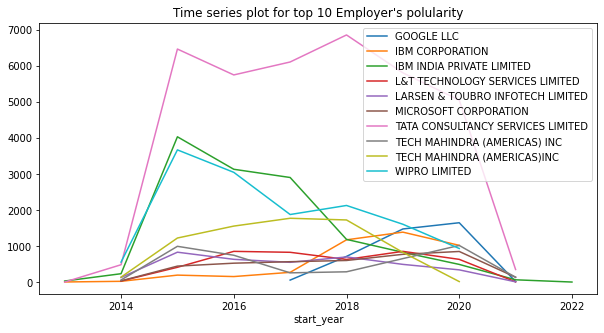

In [105]:
#define index column
h1b_timeseries=h1b_clean[h1b_clean['EMPLOYER'].isin(['TATA CONSULTANCY SERVICES LIMITED',
                                                     'WIPRO LIMITED','IBM INDIA PRIVATE LIMITED',
                                      'TECH MAHINDRA (AMERICAS)INC',
                                                     'L&T TECHNOLOGY SERVICES LIMITED',
                                                     'IBM CORPORATION','TECH MAHINDRA (AMERICAS) INC',
                                                     'MICROSOFT CORPORATION','GOOGLE LLC',
                                                     'LARSEN & TOUBRO INFOTECH LIMITED'])].groupby(['EMPLOYER','start_year'])['EMPLOYER'].agg(count='size').reset_index()

h1b_timeseries.set_index('start_year', inplace=True)

#group data by product and display sales as line chart
ax = h1b_timeseries.groupby('EMPLOYER')['count'].plot(legend=True,figsize=(10, 5))
title_timeplot = 'Time series plot for top 10 Employer\'s polularity'  
plt.title( title_timeplot )
plt.suptitle('') # that's what you're after
# ax.set_xlabel("Year");
ax = plt.show()

## hirerical clustering 

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
tech_skill

In [ ]:
# Libraries
import pandas as pd
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
 
# Data set
df = tech_skill[['Job_Title']]
df = df.set_index('Job_Title')
 
# Calculate the distance between each sample
Z = linkage(df, 'ward')
 
# Plot with Custom leaves
dendrogram(Z, leaf_rotation=90, leaf_font_size=8, labels=df.index)

# Show the graph
plt.show()